# Matplotlib

This notebook is designed to give a quick overview of how to create some common plots using the Matplotlib library. We will look at two dimension line plot, histograms and finally scatter plots and discuss how we can alter the style of the generated graphs and also how to create multiple plots as a single figure.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Line Plots

Line plots are useful if you would like to visualise a linear relationship between two variables.
We will first generate 20 data points linearly spaced between 0 and 50 to plot on the x axis, and the square of each data point to plot on the y axis.
If you are running this from a Python script you will need to call `plt.show()` to see the graph. If you would like to save the figures you create to a file you can do so by calling `plt.savefig()` after generating the plot providing the file name and type as a string argument to the function.

In [2]:
sample_data = np.linspace(0, 50, 20)
line_y = sample_data ** 2

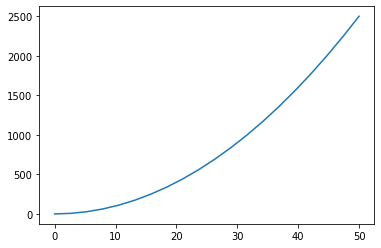

In [3]:
plt.plot(sample_data, line_y);

We can add labels to our plots by calling `plt.title()`, `plt.xlabel()` and `plt.ylabel()` with string arguments specifying what the label should be.

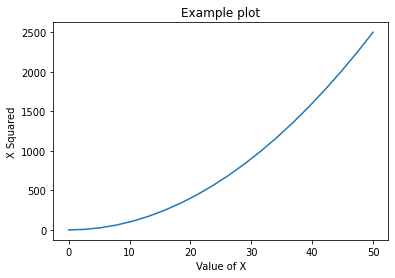

In [4]:
plt.plot(sample_data, line_y)
plt.title('Example plot')
plt.xlabel('Value of X')
plt.ylabel('X Squared');

In some cases we may want to see multiple plots side by side to make comparing them easier. To do this we can use `plt.subplot(rows, columns, plot_number)`. We must specify the number of rows and columns our plot will consist of and also which plot we are currently referencing. We may want to customise the colour of the lines in each plot so that we can describe the plots by colour. To do this we can specify the colour as a string after the x, y arguments when we call `plt.plot()`

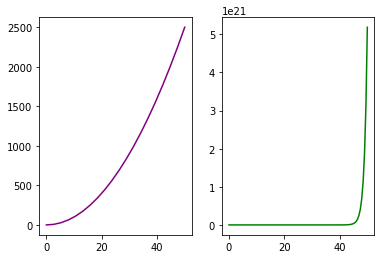

In [5]:
plt.subplot(1, 2, 1)
plt.plot(sample_data, line_y, 'purple')

line_data2 = np.linspace(0, 50, 100)
line_y2 = np.exp(line_data2)
plt.subplot(1, 2, 2)
plt.plot(line_data2, line_y2, 'green');

It is possible to build a figure in stages. We can call `plt.figure()` to create an empty plot and assign it to a variable to reference later.

In [6]:
fig = plt.figure();

<Figure size 432x288 with 0 Axes>

Calling `plot.subplots(rows, columns)` on a figure returns two values. The figure itself and the axes in which we can plot. Below we will create a plot consisting of four subplots, 2 rows by 2 columns. To add data to each plot we must index the array of axes with the row/column we want to plot. For example in our example below `ax[0, 0]` is referring to the plot at row 0, column 0 (top left) and `ax[1, 1]` is referring to the plot in row 1, column 1 (bottom right).

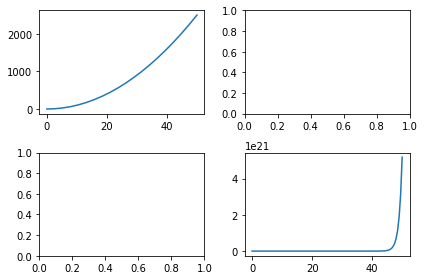

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(sample_data, line_y)
ax[1,1].plot(line_data2, line_y2)
plt.tight_layout();

We may want to increase the size of the plots. We can do this easily by specifying `figsize` as a keyword argument and providing a tuple of values in the form `(rows, columns)` to increase or decrease the size of a plot. 
In the below example we call `plt.subplots(nrows=1, ncols=2)` which will create subplots with 1 row and 2 columns. As we have one row of data we can omit the indexing of the row when adding data to the plots and instead index by the column only. For example `ax[0].plot(sample_data, y)` is referncing the plot at column 0 (the plot on the left).

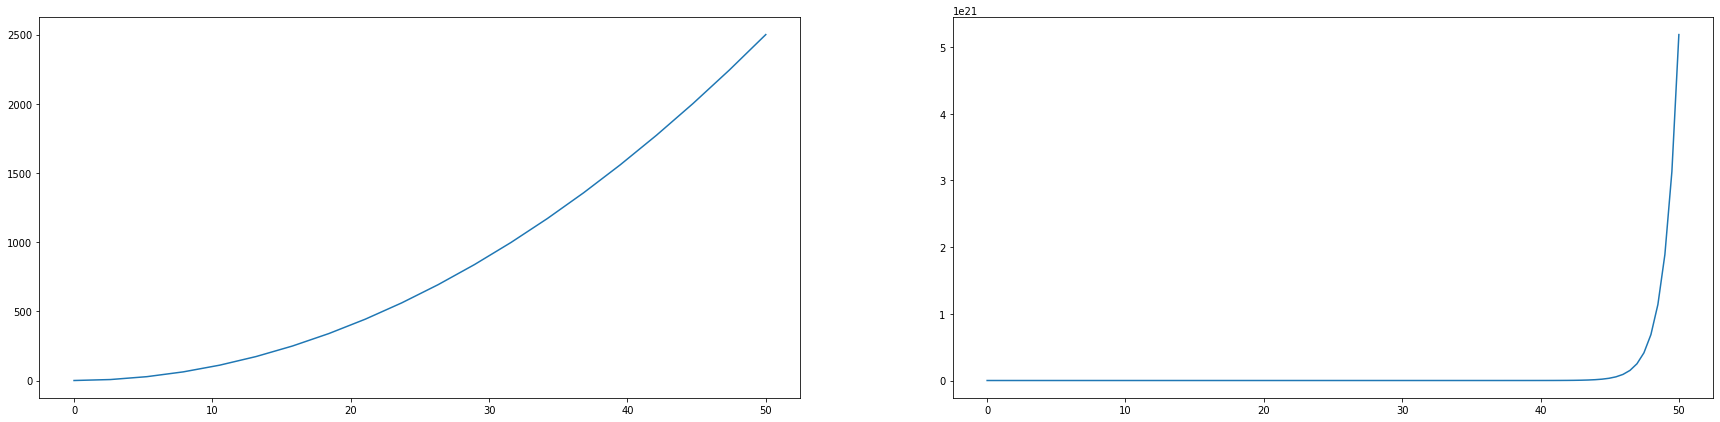

In [8]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 7))
ax[0].plot(sample_data, line_y)
ax[1].plot(line_data2, line_y2);

`plt.figire()` initially creates an empty plot so the first thing we must do is add axes to it, this is done by callinf `fig.add_axes()` which takes one required arugment, which is an array specifying axes values. It is sufficient to initialise the axes with small values (typically 0 to 1) as when we add data to our plots matplotlib will scale the axes appropriately for us. The array of values given to `add_axes()` is in the form `[left, bottom, width, height]`.
We can also add a legend to the plots we create by specifying a `label` for each line we plot.


Below we will create an empty plot, add a set of axes to the plot and add two lines to the plot, a line showing the values of x^2 represented by a green line, and another showing the values of x^3 represented by a blue line. Note to view the plot with the legened we call `ax.legned()`

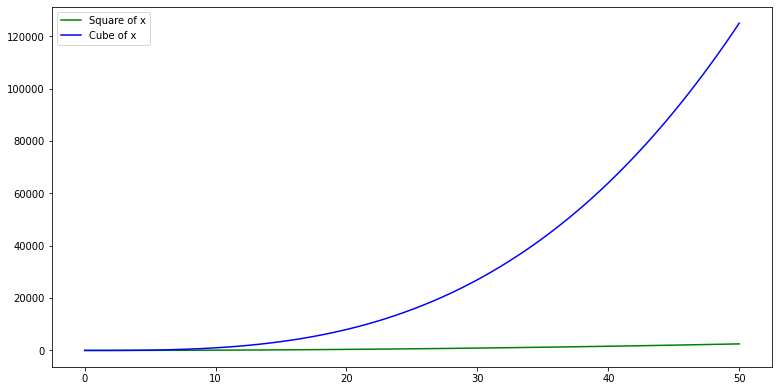

In [9]:
my_fig = plt.figure(figsize=(10, 5))
ax = my_fig.add_axes([0, 0, 1, 1])
ax.plot(sample_data, sample_data**2, 'green', label='Square of x')
ax.plot(line_data2, line_data2**3, 'blue', label='Cube of x')

ax.legend();

Plot also takes many other arguments we can use to style the data we are plotting. For example we can choose to make the line thicker by specifying a `linewidth` value, change the style of the line by providing a `linestyle`argument, add markers for each point and specify the size of the markers.


Note only the following values are supported for `linestyle`: '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted

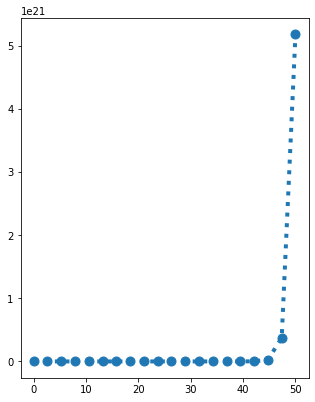

In [10]:
fig = plt.figure(figsize=(4, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(sample_data, np.exp(sample_data), linewidth=4, linestyle='dotted', marker='o', markersize=9);

## Histograms
To create histograms we can use `plt.hist()`
`Numpy.randn()` returns a sample from the “standard normal” distribution.

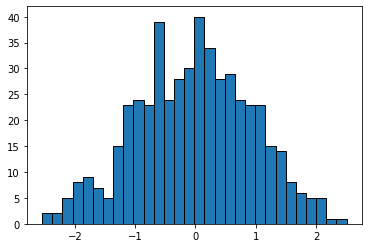

In [11]:
hist_data = np.random.randn(500)
plt.hist(hist_data, bins=30, edgecolor="black", align="mid");

## Scatter Plots

Scatter graphs are useful if you would like to get an idea for how your data is distributed. Much like the other graphs we have seen already we can create scatter plots simply by calling `plt.scatter(x, y)`. Below are two example of how we can plot different types of data using scatter plots. The second example is an illustration of how we can generate complex data sets and plot them easily using matplotlib, but it is not necessary that you understand this example at this time.

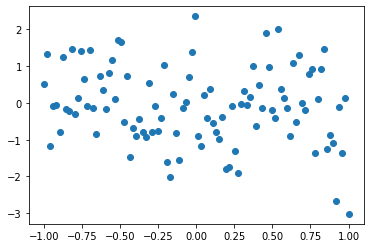

In [12]:
scatter_x = np.linspace(-1, 1, 100)
scatter_y = np.random.randn(100)
plt.scatter(scatter_x, scatter_y);

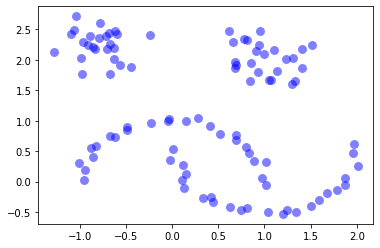

In [13]:
import sklearn.datasets as data
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds);

This Iris dataset is a classic and very easy multi-class classification dataset. Below is a plot of two of the features from this dataset. Why would we rather visualise this data as a scatter plot rather than a line plot?

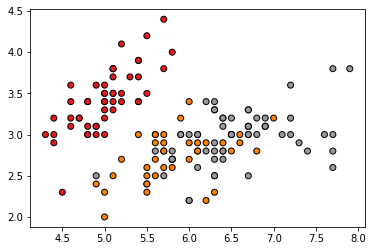

In [14]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k');

It is also possible to plot multiple graph types when using subplots. Below we will plot each of the different graph types we have covered in this tutorial in a single row.

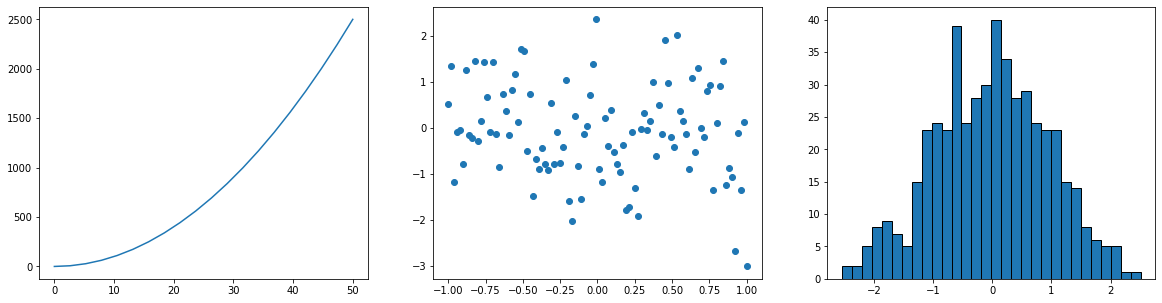

In [15]:
fix, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].plot(sample_data, line_y)
ax[1].scatter(scatter_x, scatter_y)
ax[2].hist(hist_data, bins=30, edgecolor="black", align="mid");